In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-customer-satisfaction/Airline_customer_satisfaction.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
airline_data = pd.read_csv('/kaggle/input/airline-customer-satisfaction/Airline_customer_satisfaction.csv')
airline_data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


## Data Preparation

In [4]:
# converting columns to lower case
import re
airline_data.columns = airline_data.columns.map(lambda x: re.sub('\s+','_',x.lower().strip()))
airline_data.columns

Index(['satisfaction', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'seat_comfort', 'departure/arrival_time_convenient',
       'food_and_drink', 'gate_location', 'inflight_wifi_service',
       'inflight_entertainment', 'online_support', 'ease_of_online_booking',
       'on-board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')

In [5]:
airline_data.describe()

,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<Axes: >

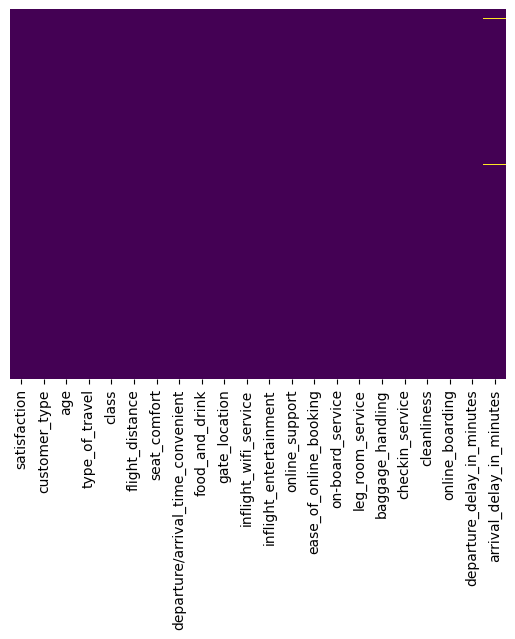

In [6]:
# check for null values in the data
sns.heatmap(airline_data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [7]:
# Drop null values
airline_df = airline_data.dropna()
round(100*(airline_df.isnull().sum() / len(airline_df.index)),2)

satisfaction                         0.0
customer_type                        0.0
age                                  0.0
type_of_travel                       0.0
class                                0.0
flight_distance                      0.0
seat_comfort                         0.0
departure/arrival_time_convenient    0.0
food_and_drink                       0.0
gate_location                        0.0
inflight_wifi_service                0.0
inflight_entertainment               0.0
online_support                       0.0
ease_of_online_booking               0.0
on-board_service                     0.0
leg_room_service                     0.0
baggage_handling                     0.0
checkin_service                      0.0
cleanliness                          0.0
online_boarding                      0.0
departure_delay_in_minutes           0.0
arrival_delay_in_minutes             0.0
dtype: float64

In [8]:
# check classes of each column
airline_df.dtypes

satisfaction                          object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
seat_comfort                           int64
departure/arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
dtype: obj

In [9]:
airline_df['class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [10]:
airline_df

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


## Preprocessing Steps

In [11]:
# Create dummy variables
satisfaction_dummy = pd.get_dummies(airline_df['satisfaction'], drop_first=True)
customer_type_dummy = pd.get_dummies(airline_df['customer_type'], drop_first=True)
type_of_travel_dummy = pd.get_dummies(airline_df['type_of_travel'], drop_first=True)

# Concatenating dummy variables to the original DataFrame
airline_df = pd.concat([airline_df, satisfaction_dummy, customer_type_dummy, type_of_travel_dummy], axis=1)

# Dropping original columns
airline_df = airline_df.drop(['satisfaction', 'customer_type', 'type_of_travel'], axis=1)

airline_df.head()

,age,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied,disloyal Customer,Personal Travel
0,65,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,True,False,True
1,47,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,True,False,True
2,15,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,True,False,True
3,60,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,True,False,True
4,70,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,True,False,True


In [12]:
# Convert boolean columns 
airline_df['satisfied'] = airline_df['satisfied'].astype(int)
airline_df['disloyal Customer'] = airline_df['disloyal Customer'].astype(int)
airline_df['Personal Travel'] = airline_df['Personal Travel'].astype(int)

# Display the updated DataFrame
airline_df.head()

,age,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied,disloyal Customer,Personal Travel
0,65,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0,1
1,47,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,0,1
2,15,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,1
3,60,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,1
4,70,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0,1


In [13]:
airline_df['departure_delay_in_minutes'].describe()

count    129487.000000
mean         14.643385
std          37.932867
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: departure_delay_in_minutes, dtype: float64

In [14]:
# categorizing departure delays
def late_departures(minutes):
    if minutes == 0:
        return 'On-time'
    elif minutes <= 30:
        return 'Slight-delay'
    else:
        return 'Late Departure'

airline_df['departure_delay_in_minutes'] = airline_df['departure_delay_in_minutes'].apply(late_departures)

# Display unique values in the new column
print(airline_df['departure_delay_in_minutes'].unique())

['On-time' 'Late Departure' 'Slight-delay']


In [15]:
airline_df['arrival_delay_in_minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: arrival_delay_in_minutes, dtype: float64

In [16]:
# categorizing arrival delays
def late_arrivals(minutes):
    if minutes == 0:
        return 'On-time'
    elif minutes <= 30:
        return 'Slight-delay'
    else:
        return 'Late Departure'

airline_df['arrival_delay_in_minutes'] = airline_df['arrival_delay_in_minutes'].apply(late_arrivals)

# Display unique values in the new column
print(airline_df['arrival_delay_in_minutes'].unique())

['On-time' 'Late Departure' 'Slight-delay']


In [17]:
airline_df.head()

,age,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied,disloyal Customer,Personal Travel
0,65,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,On-time,On-time,1,0,1
1,47,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,Late Departure,Late Departure,1,0,1
2,15,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,On-time,On-time,1,0,1
3,60,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,On-time,On-time,1,0,1
4,70,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,On-time,On-time,1,0,1


In [18]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encode_cols = ['class','departure_delay_in_minutes','arrival_delay_in_minutes']

for col in encode_cols:
    airline_df[col] = le.fit_transform(airline_df[col])

airline_df.head()

,age,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied,disloyal Customer,Personal Travel
0,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,1,1,1,0,1
1,47,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0,0,1,0,1
2,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,1,1,1,0,1
3,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,1,1,1,0,1
4,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,1,1,1,0,1


In [19]:
print(f"Classes: {le.classes_}")
print(f"Encoded values: {le.transform(le.classes_)}")

Classes: ['Late Departure' 'On-time' 'Slight-delay']
Encoded values: [0 1 2]


### Target variable is customer satisfaction. 

In [20]:
from sklearn.model_selection import train_test_split

x = airline_df.drop(columns = ['satisfied'])
y = airline_df['satisfied']

In [21]:
# check if there is any imbalance in the target variable
y.value_counts()

satisfied
1    70882
0    58605
Name: count, dtype: int64

In [22]:
# check proportion of each classes
class_1 = 70882 / (70882+58605)

class_0 = 58605 / (70882+58605)

diff_proportion = abs(class_1 - class_0)

print('The proportion of Class 1 Distribution: ',class_1)
print('The proportion of Class 0 Distribution: ',class_0)
print('The difference in Proportion: ',diff_proportion)

The proportion of Class 1 Distribution:  0.54740630333547
The proportion of Class 0 Distribution:  0.45259369666453003
The difference in Proportion:  0.09481260667093999


### There is a 9.4% of differnce between the class 1 and class 0. The dataset is relatively balanced but not perfectly.

In [23]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42,shuffle = True, stratify = y)

print('Training size: ',X_train.shape)
print('Testing size: ',X_test.shape)
print('Training label size: ',y_train.shape)
print('Testing label size: ',y_test.shape)


Training size:  (97115, 21)
Testing size:  (32372, 21)
Training label size:  (97115,)
Testing label size:  (32372,)


# Model Building

## Decision Tree

In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier()

decision_tree = tree1.fit(X_train,y_train)

In [25]:
# Predict model
dtree_pred = decision_tree.predict(X_test)

In [26]:
from sklearn import metrics

# Accuracy for decision tree model
metrics.accuracy_score(dtree_pred,y_test)

0.9317929074508835

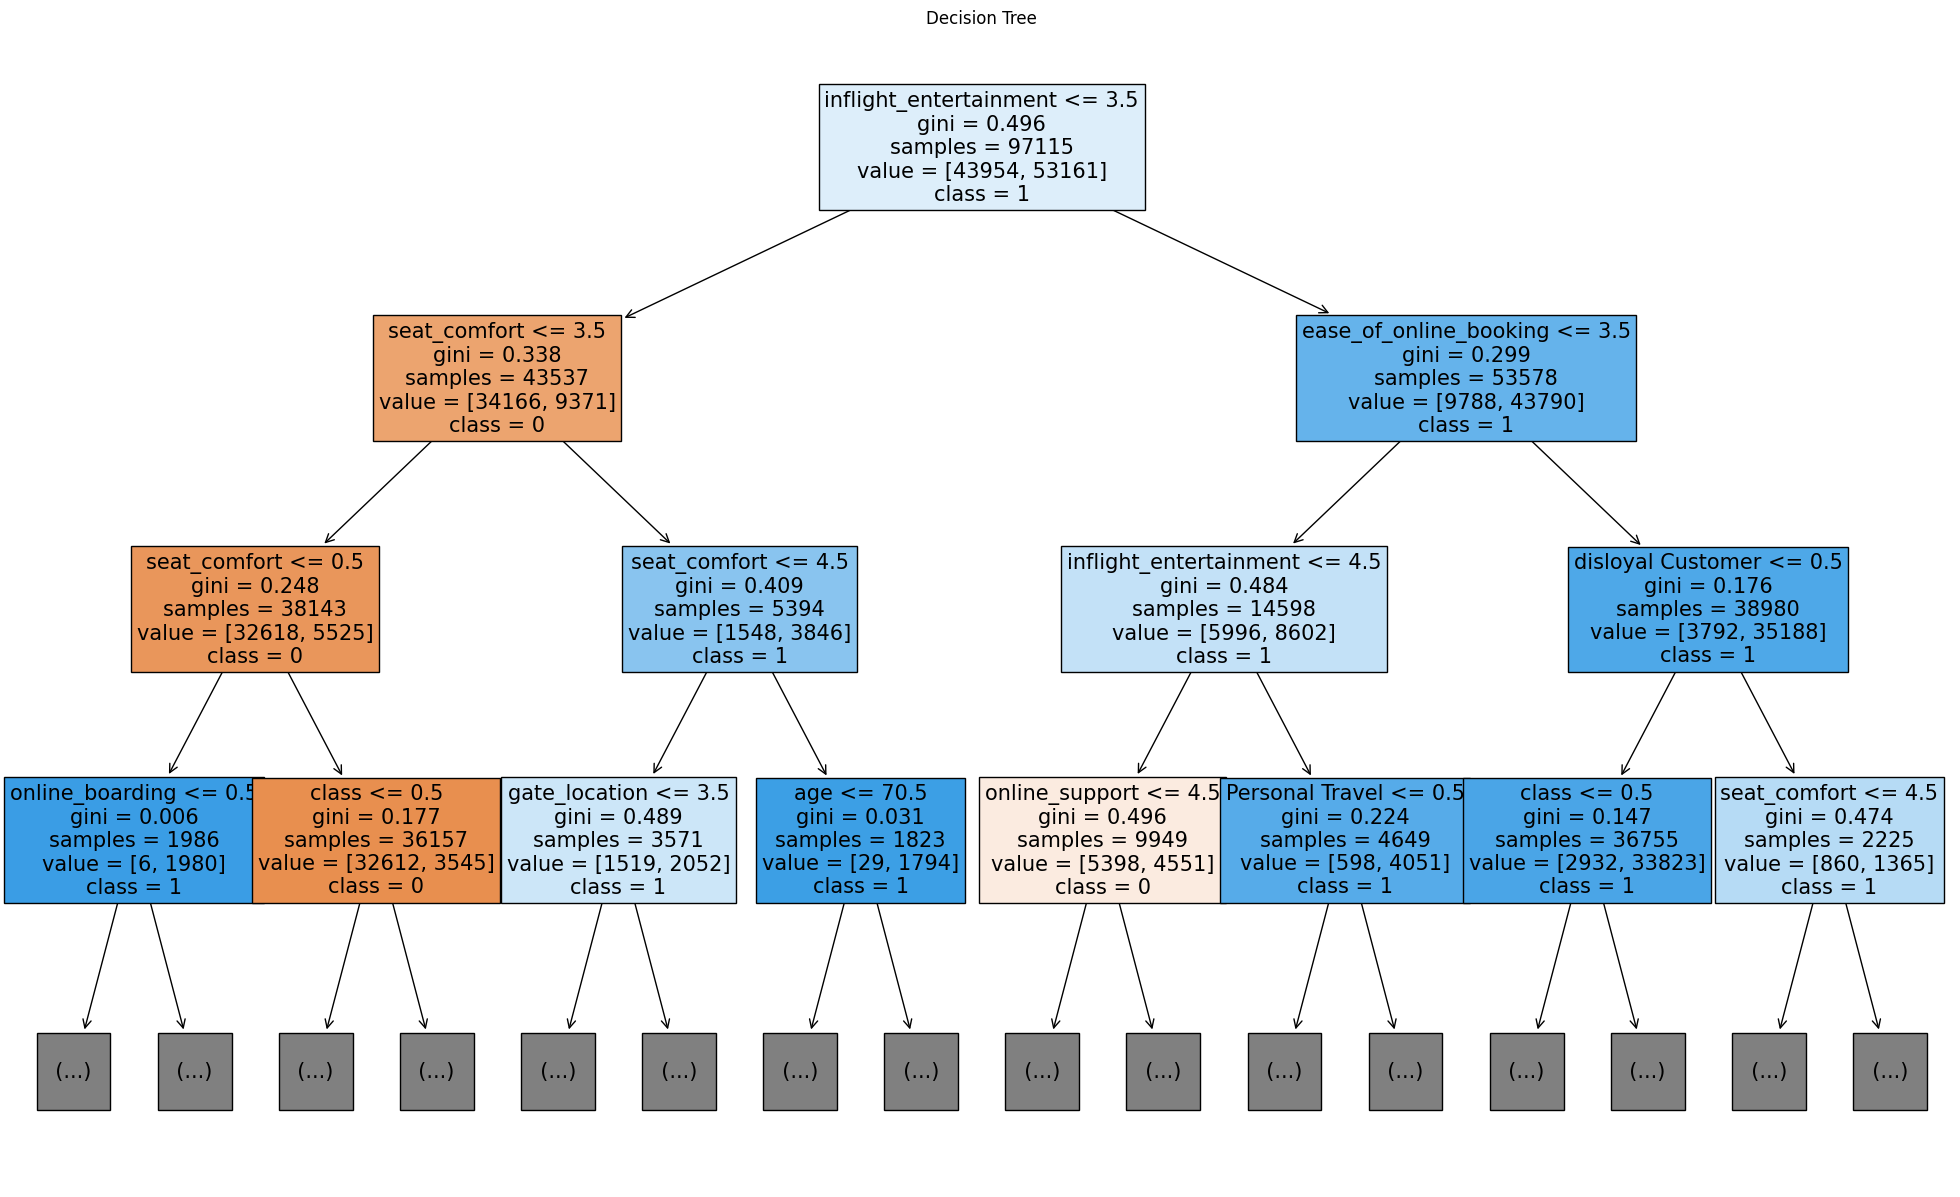

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'], max_depth=3, fontsize=15)
plt.title("Decision Tree")
plt.show()


In [65]:
feature_importance = decision_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:\n\n",feature_importance_df)

Feature Importance:

                               Feature  Importance
8              inflight_entertainment    0.395030
3                        seat_comfort    0.181186
10             ease_of_online_booking    0.065025
19                  disloyal Customer    0.042065
2                     flight_distance    0.037282
6                       gate_location    0.031772
0                                 age    0.027655
4   departure/arrival_time_convenient    0.023269
20                    Personal Travel    0.022087
1                               class    0.021290
9                      online_support    0.020873
14                    checkin_service    0.020676
15                        cleanliness    0.019577
13                   baggage_handling    0.018918
12                   leg_room_service    0.018755
5                      food_and_drink    0.014905
11                   on-board_service    0.012187
16                    online_boarding    0.009969
7               inflight_wif

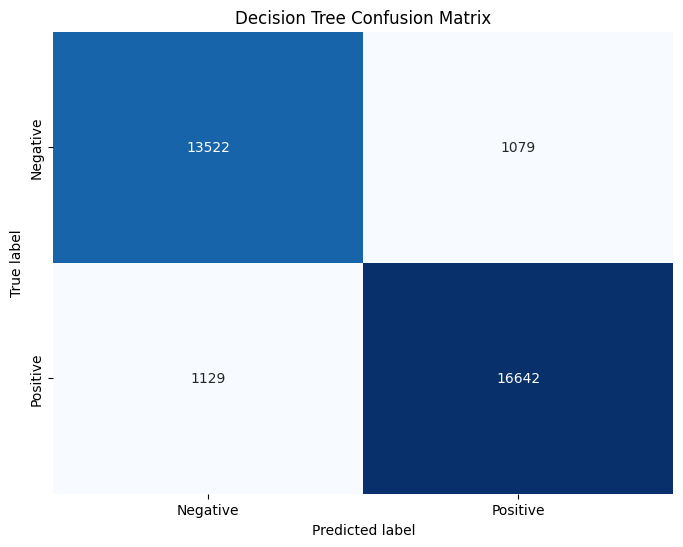

In [28]:
from sklearn.metrics import confusion_matrix
d_tree_conf = confusion_matrix(dtree_pred,y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(d_tree_conf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [29]:
from sklearn.metrics import classification_report

print(classification_report(dtree_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     14601
           1       0.94      0.94      0.94     17771

    accuracy                           0.93     32372
   macro avg       0.93      0.93      0.93     32372
weighted avg       0.93      0.93      0.93     32372



### Support Vector Machine (SVM)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)


In [70]:

metrics.accuracy_score(y_test, y_pred_svm)

0.829451377733844

In [72]:
print(metrics.classification_report(y_pred_svm,y_test))


              precision    recall  f1-score   support

           0       0.82      0.81      0.81     14938
           1       0.84      0.85      0.84     17434

    accuracy                           0.83     32372
   macro avg       0.83      0.83      0.83     32372
weighted avg       0.83      0.83      0.83     32372



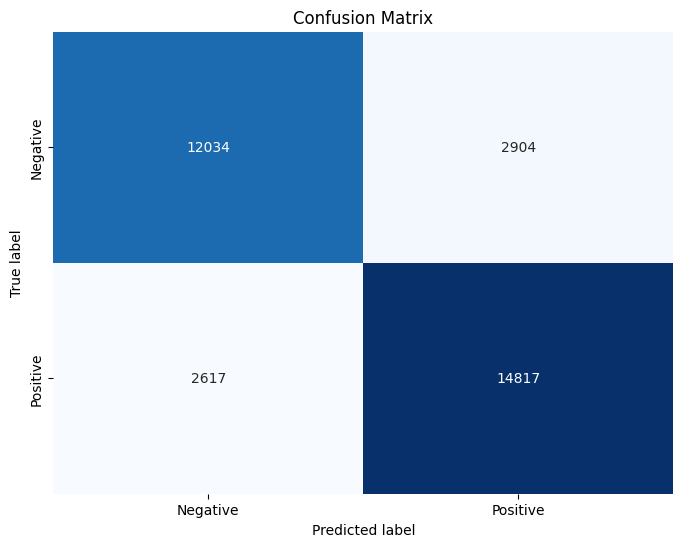

In [73]:
svm_conf = confusion_matrix(y_pred_svm,y_test)
svm_conf

plt.figure(figsize=(8,6))
sns.heatmap(svm_conf,annot = True,fmt = 'd',cmap = 'Blues',cbar = False,
           xticklabels = ['Negative','Positive'],
           yticklabels = ['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf = RandomForestClassifier(n_estimators=50, max_depth=4)

rf_model = rf.fit(X_train,y_train)

rf_pred = rf_model.predict(X_test)

In [31]:
metrics.accuracy_score(rf_pred,y_test)

0.8790312615840851

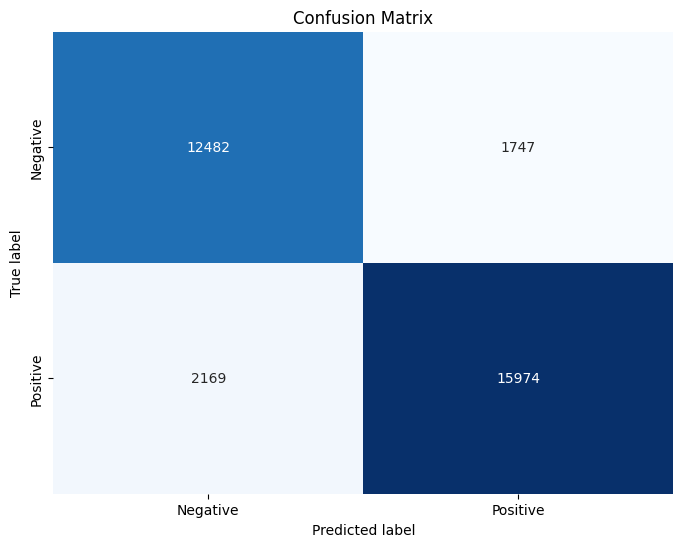

In [32]:
rf_conf = confusion_matrix(rf_pred,y_test)
rf_conf

plt.figure(figsize=(8,6))
sns.heatmap(rf_conf,annot = True,fmt = 'd',cmap = 'Blues',cbar = False,
           xticklabels = ['Negative','Positive'],
           yticklabels = ['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [33]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     14229
           1       0.90      0.88      0.89     18143

    accuracy                           0.88     32372
   macro avg       0.88      0.88      0.88     32372
weighted avg       0.88      0.88      0.88     32372



## K Nearest Neighbor (KNN) Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn1 = KNeighborsClassifier(n_neighbors = 6,metric="minkowski",p = 2)

knn1_model = knn1.fit(X_train,y_train)

knn1_pred = knn1_model.predict(X_test)

In [36]:
metrics.accuracy_score(knn1_pred,y_test)

0.7686272086988756

In [37]:
print(metrics.classification_report(knn1_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76     16645
           1       0.73      0.83      0.78     15727

    accuracy                           0.77     32372
   macro avg       0.77      0.77      0.77     32372
weighted avg       0.77      0.77      0.77     32372



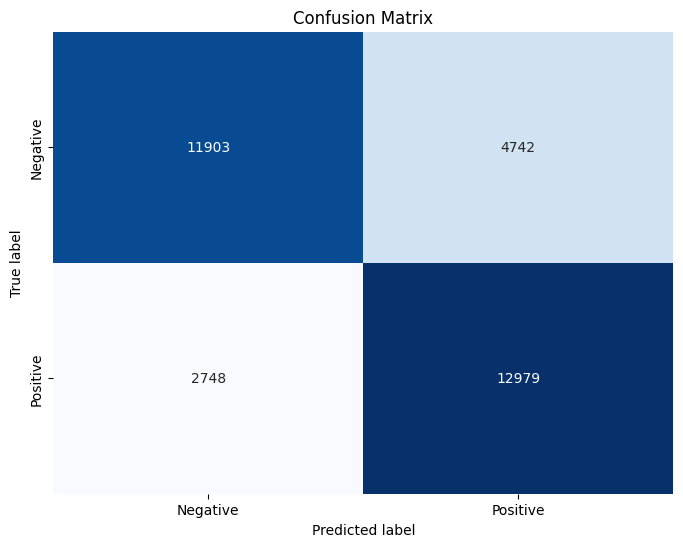

In [38]:
knn_conf = confusion_matrix(knn1_pred,y_test)
knn_conf

plt.figure(figsize=(8,6))
sns.heatmap(knn_conf,annot = True,fmt = 'd',cmap = 'Blues',cbar = False,
           xticklabels = ['Negative','Positive'],
           yticklabels = ['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [74]:
X_train.shape

(97115, 21)

In [75]:
k_values = [2, 4, 6, 8, 10, 12, 14,16]

accuracy_scores = []
misclassification_errors = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)

    #Accuracy and Misclassifcation error
    accuracy = accuracy_score(y_test, knn_pred)
    accuracy_scores.append(accuracy)

    misclassification_error = 1 - accuracy
    misclassification_errors.append(misclassification_error)

    print(f'k={k}: Accuracy={accuracy:.3f}, Misclassification Error={misclassification_error:.3f}')


k=2: Accuracy=0.893, Misclassification Error=0.107
k=4: Accuracy=0.905, Misclassification Error=0.095
k=6: Accuracy=0.909, Misclassification Error=0.091
k=8: Accuracy=0.911, Misclassification Error=0.089
k=10: Accuracy=0.912, Misclassification Error=0.088
k=12: Accuracy=0.910, Misclassification Error=0.090
k=14: Accuracy=0.911, Misclassification Error=0.089
k=16: Accuracy=0.911, Misclassification Error=0.089


### 10 is the best K value with low misclassification error.

In [76]:
knn_10_mod = KNeighborsClassifier(n_neighbors=10)
knn_10_mod.fit(X_train, y_train)
knn_10_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, knn_10_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, knn_10_pred)
print("Classification Report:\n", report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, knn_10_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.910787099962931
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91     14651
           1       0.95      0.89      0.92     17721

    accuracy                           0.91     32372
   macro avg       0.91      0.91      0.91     32372
weighted avg       0.91      0.91      0.91     32372

Confusion Matrix:
 [[13757   894]
 [ 1994 15727]]


### Bagging with 10 estimators

In [39]:
from sklearn.ensemble import BaggingClassifier

bag1 = BaggingClassifier(n_estimators = 10, random_state = 42)
bag1.fit(X_train,y_train)

BaggingClassifier(random_state=42)

In [42]:
bag_pred = bag1.predict(X_test)

bag1.score(X_test,y_test)

0.9481341900407759

In [44]:
print(metrics.classification_report(bag_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     15126
           1       0.94      0.97      0.95     17246

    accuracy                           0.95     32372
   macro avg       0.95      0.95      0.95     32372
weighted avg       0.95      0.95      0.95     32372



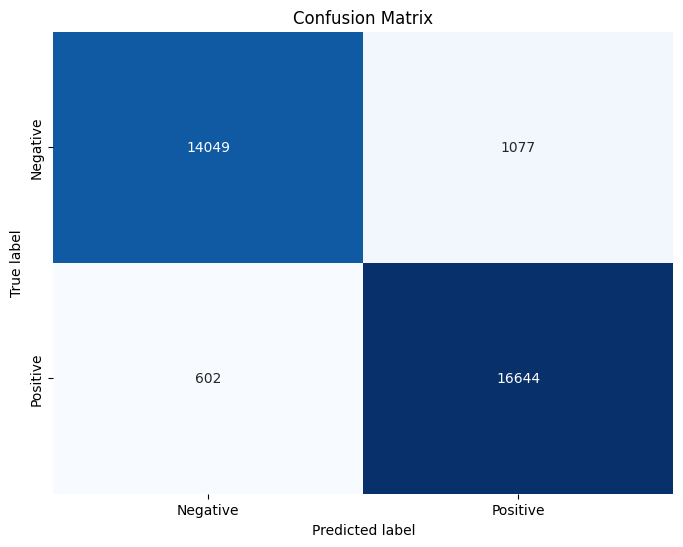

In [45]:
bag_conf = confusion_matrix(bag_pred,y_test)
bag_conf

plt.figure(figsize=(8,6))
sns.heatmap(bag_conf,annot = True,fmt = 'd',cmap = 'Blues',cbar = False,
           xticklabels = ['Negative','Positive'],
           yticklabels = ['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Bagging with 20 estimators

In [46]:
bag2 = BaggingClassifier(n_estimators = 20, random_state = 42)
bag2.fit(X_train,y_train)

BaggingClassifier(n_estimators=20, random_state=42)

In [54]:
bag2_pred = bag2.predict(X_test)

metrics.accuracy_score(bag2_pred,y_test)

0.9503274434696651

In [48]:
print(metrics.classification_report(bag2_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     15035
           1       0.94      0.96      0.95     17337

    accuracy                           0.95     32372
   macro avg       0.95      0.95      0.95     32372
weighted avg       0.95      0.95      0.95     32372



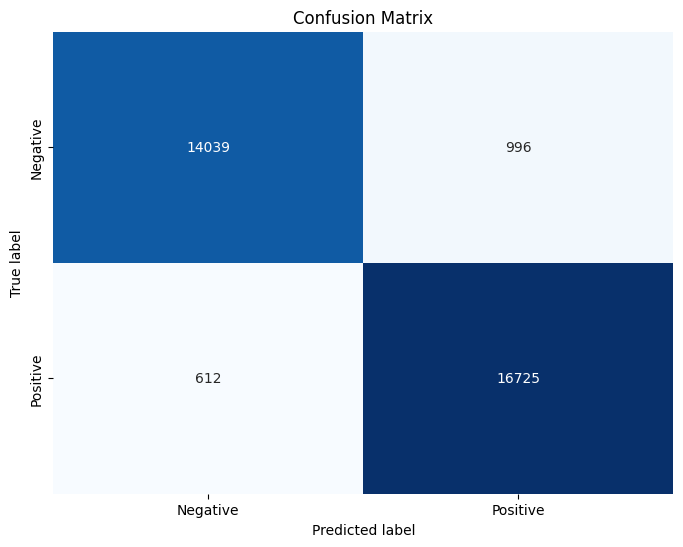

In [58]:
bag2_conf = confusion_matrix(bag2_pred,y_test)
bag2_conf

plt.figure(figsize=(8,6))
sns.heatmap(bag2_conf,annot = True,fmt = 'd',cmap = 'Blues',cbar = False,
           xticklabels = ['Negative','Positive'],
           yticklabels = ['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [51]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier

### Boosting using Ada Boost

In [52]:
boost1 = AdaBoostClassifier(n_estimators = 50,learning_rate = 0.2).fit(X_train,y_train)

boost1_pred = boost1.predict(X_test)

In [53]:
metrics.accuracy_score(boost1_pred,y_test)

0.8823674780674657

In [56]:
print(metrics.classification_report(boost1_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     14485
           1       0.90      0.89      0.89     17887

    accuracy                           0.88     32372
   macro avg       0.88      0.88      0.88     32372
weighted avg       0.88      0.88      0.88     32372



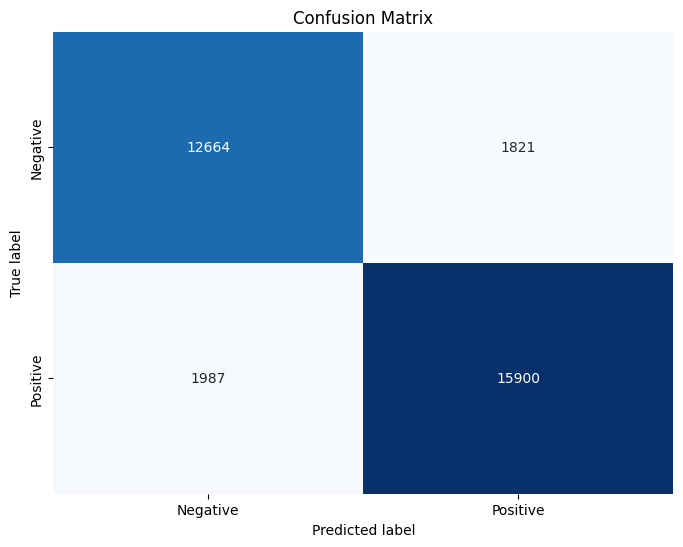

In [57]:
boost1_conf = confusion_matrix(boost1_pred,y_test)
boost1_conf

plt.figure(figsize=(8,6))
sns.heatmap(boost1_conf,annot = True,fmt = 'd',cmap = 'Blues',cbar = False,
           xticklabels = ['Negative','Positive'],
           yticklabels = ['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Boosting using XGB Classifier

In [61]:
boost2 = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)

In [62]:
boost2.fit(X_train,y_train,early_stopping_rounds = 5,verbose = False, eval_set = [(X_test,y_test)])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
boost2.score(X_test,y_test)

0.9550228592610899

# Conclusion

### From the different models, we can conclude that ensemble methods such as Bagging and Boosting performed well in classifying.

### Bagging with 20 estimators and XGB Classifier achieved an accuracy of 95%